# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
from encodings.aliases import aliases # Python has a file containing a dictionary of encoding names and associated aliases
# the matplotlib plots will appear directly below the cell in which the plot function was called.
%matplotlib inline

# Read in the CSV files and remove duplicates

In [2]:
# To find encodings that work

# Below line creates a set of all available encodings
alias_values = set(aliases.values())

for encoding in set(aliases.values()):
    try:
        df=pd.read_csv("crime.csv", nrows=10, encoding=encoding) # read in only 10 lines for faster read
        print('successful', encoding)
    except:
        pass

successful iso8859_9
successful mac_iceland
successful iso8859_5
successful cp437
successful cp949
successful cp855
successful cp852
successful cp864
successful ptcp154
successful cp1254
successful cp862
successful mbcs
successful gb18030
successful latin_1
successful gbk
successful cp1026
successful cp869
successful cp037
successful cp1252
successful iso8859_10
successful cp1258
successful iso8859_6
successful mac_greek
successful mac_roman
successful iso8859_13
successful hp_roman8
successful mac_cyrillic
successful cp858
successful koi8_r
successful utf_16_be
successful iso8859_15
successful big5hkscs
successful cp1256
successful cp863
successful cp775
successful cp857
successful utf_16_le
successful cp1251
successful cp1255
successful kz1048
successful iso8859_3
successful cp500
successful cp860
successful iso8859_4
successful cp1125
successful cp1250
successful cp865
successful iso8859_8
successful cp861
successful cp1140
successful iso8859_16
successful iso8859_7
successful iso88

In [4]:
crime = pd.read_csv('crime.csv', encoding="iso8859_11")

In [5]:
crime.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [7]:
crime.shape

(319073, 17)

In [8]:
crime.isna().sum()

INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                 1765
REPORTING_AREA              0
SHOOTING               318054
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                   90
STREET                  10871
Lat                     19999
Long                    19999
Location                    0
dtype: int64

In [10]:
crime.duplicated().sum()

23

In [11]:
crime.drop_duplicates(inplace=True)

In [12]:
crime.duplicated().sum()

0

In [13]:
crime.shape

(319050, 17)

# Explore Dataset

In [14]:
crime.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [15]:
crime.tail()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"
319072,142052550,3125,Warrant Arrests,WARRANT ARREST,D4,903,NaN,2015-06-22 00:12:00,2015,6,Monday,0,Part Three,WASHINGTON ST,42.333839,-71.080290,"(42.33383935, -71.08029038)"


In [16]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 319050 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      319050 non-null  object 
 1   OFFENSE_CODE         319050 non-null  int64  
 2   OFFENSE_CODE_GROUP   319050 non-null  object 
 3   OFFENSE_DESCRIPTION  319050 non-null  object 
 4   DISTRICT             317285 non-null  object 
 5   REPORTING_AREA       319050 non-null  object 
 6   SHOOTING             1019 non-null    object 
 7   OCCURRED_ON_DATE     319050 non-null  object 
 8   YEAR                 319050 non-null  int64  
 9   MONTH                319050 non-null  int64  
 10  DAY_OF_WEEK          319050 non-null  object 
 11  HOUR                 319050 non-null  int64  
 12  UCR_PART             318960 non-null  object 
 13  STREET               308179 non-null  object 
 14  Lat                  299052 non-null  float64
 15  Long                 2

In [18]:
crime['OCCURRED_ON_DATE'] 

0         2018-09-02 13:00:00
1         2018-08-21 00:00:00
2         2018-09-03 19:27:00
3         2018-09-03 21:16:00
4         2018-09-03 21:05:00
                 ...         
319068    2016-06-05 17:25:00
319069    2015-07-09 13:38:00
319070    2015-07-09 13:38:00
319071    2016-05-31 19:35:00
319072    2015-06-22 00:12:00
Name: OCCURRED_ON_DATE, Length: 319050, dtype: object

In [20]:
crime['OCCURRED_ON_DATE'] = pd.to_datetime(crime['OCCURRED_ON_DATE'])

In [21]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 319050 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   INCIDENT_NUMBER      319050 non-null  object        
 1   OFFENSE_CODE         319050 non-null  int64         
 2   OFFENSE_CODE_GROUP   319050 non-null  object        
 3   OFFENSE_DESCRIPTION  319050 non-null  object        
 4   DISTRICT             317285 non-null  object        
 5   REPORTING_AREA       319050 non-null  object        
 6   SHOOTING             1019 non-null    object        
 7   OCCURRED_ON_DATE     319050 non-null  datetime64[ns]
 8   YEAR                 319050 non-null  int64         
 9   MONTH                319050 non-null  int64         
 10  DAY_OF_WEEK          319050 non-null  object        
 11  HOUR                 319050 non-null  int64         
 12  UCR_PART             318960 non-null  object        
 13  STREET             

In [22]:
yr = crime['OCCURRED_ON_DATE'].dt.year
yr

0         2018
1         2018
2         2018
3         2018
4         2018
          ... 
319068    2016
319069    2015
319070    2015
319071    2016
319072    2015
Name: OCCURRED_ON_DATE, Length: 319050, dtype: int32

In [23]:
month = crime['OCCURRED_ON_DATE'].dt.month
month

0         9
1         8
2         9
3         9
4         9
         ..
319068    6
319069    7
319070    7
319071    5
319072    6
Name: OCCURRED_ON_DATE, Length: 319050, dtype: int32

In [27]:
# summary info of numeric columns
crime.describe()

,OFFENSE_CODE,OCCURRED_ON_DATE,YEAR,MONTH,HOUR,Lat,Long
count,319050.000000,319050,319050.000000,319050.000000,319050.000000,299052.000000,299052.000000
mean,2317.516957,2017-01-25 12:35:59.149211904,2016.560674,6.609622,13.118176,42.214373,-70.908260
min,111.000000,2015-06-15 00:00:00,2015.000000,1.000000,0.000000,-1.000000,-71.178674
25%,1001.000000,2016-04-12 03:30:00,2016.000000,4.000000,9.000000,42.297438,-71.097135
50%,2907.000000,2017-01-28 04:36:00,2017.000000,7.000000,14.000000,42.325538,-71.077524
75%,3201.000000,2017-11-05 18:39:00,2017.000000,9.000000,18.000000,42.348624,-71.062467
max,3831.000000,2018-09-03 21:25:00,2018.000000,12.000000,23.000000,42.395042,-1.000000
std,1185.308921,NaN,0.996312,3.273677,6.294258,2.159845,3.493746


In [28]:
# summary info of non numeric columns
crime.describe(include='object')

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,DAY_OF_WEEK,UCR_PART,STREET,Location
count,319050,319050,319050,317285,319050,1019,319050,318960,308179,319050
unique,282517,67,244,12,879,1,7,4,4657,18194
top,I162030584,Motor Vehicle Accident Response,SICK/INJURED/MEDICAL - PERSON,B2,,Y,Friday,Part Three,WASHINGTON ST,"(0.00000000, 0.00000000)"
freq,13,37132,18783,49940,20250,1019,48489,158537,14192,19998


In [29]:
crime.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')

In [31]:
# columns with missing values
crime.columns[np.sum(crime.isna()) != 0]

Index(['DISTRICT', 'SHOOTING', 'UCR_PART', 'STREET', 'Lat', 'Long'], dtype='object')

In [32]:
# columns with missing values
crime.columns[(crime.isna().sum()) != 0]

Index(['DISTRICT', 'SHOOTING', 'UCR_PART', 'STREET', 'Lat', 'Long'], dtype='object')

In [33]:
# columns with no missing values
crime.columns[(crime.isna().sum()) == 0]

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'REPORTING_AREA', 'OCCURRED_ON_DATE', 'YEAR',
       'MONTH', 'DAY_OF_WEEK', 'HOUR', 'Location'],
      dtype='object')

In [36]:
crime.isnull()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319068,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
319069,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
319070,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
319071,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


In [37]:
crime.isnull().sum() 

INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                 1765
REPORTING_AREA              0
SHOOTING               318031
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                   90
STREET                  10871
Lat                     19998
Long                    19998
Location                    0
dtype: int64

In [38]:
# only missing value columns
crime.isnull().sum() != 0

INCIDENT_NUMBER        False
OFFENSE_CODE           False
OFFENSE_CODE_GROUP     False
OFFENSE_DESCRIPTION    False
DISTRICT                True
REPORTING_AREA         False
SHOOTING                True
OCCURRED_ON_DATE       False
YEAR                   False
MONTH                  False
DAY_OF_WEEK            False
HOUR                   False
UCR_PART                True
STREET                  True
Lat                     True
Long                    True
Location               False
dtype: bool

In [41]:
crime['OFFENSE_CODE'].nunique()

222

In [45]:
for col in crime.columns:
    unique_values = crime[col].nunique()
    print(col+" has "+str(unique_values)+" unique values")

INCIDENT_NUMBER has 282517 unique values
OFFENSE_CODE has 222 unique values
OFFENSE_CODE_GROUP has 67 unique values
OFFENSE_DESCRIPTION has 244 unique values
DISTRICT has 12 unique values
REPORTING_AREA has 879 unique values
SHOOTING has 1 unique values
OCCURRED_ON_DATE has 233229 unique values
YEAR has 4 unique values
MONTH has 12 unique values
DAY_OF_WEEK has 7 unique values
HOUR has 24 unique values
UCR_PART has 4 unique values
STREET has 4657 unique values
Lat has 18178 unique values
Long has 18178 unique values
Location has 18194 unique values


# Let's tackle a few questions

# what are the most common crimes in terms of offense group?

In [48]:
offense_val = crime['OFFENSE_CODE_GROUP'].value_counts()
offense_val

OFFENSE_CODE_GROUP
Motor Vehicle Accident Response              37132
Larceny                                      25935
Medical Assistance                           23540
Investigate Person                           18749
Other                                        18073
                                             ...  
HUMAN TRAFFICKING                                7
INVESTIGATE PERSON                               4
Biological Threat                                2
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE        2
Burglary - No Property Taken                     2
Name: count, Length: 67, dtype: int64

In [55]:
# top 10 offense group
offense_val_top = crime['OFFENSE_CODE_GROUP'].value_counts()[:10]
offense_val_top

OFFENSE_CODE_GROUP
Motor Vehicle Accident Response    37132
Larceny                            25935
Medical Assistance                 23540
Investigate Person                 18749
Other                              18073
Drug Violation                     16545
Simple Assault                     15826
Vandalism                          15414
Verbal Disputes                    13099
Towed                              11287
Name: count, dtype: int64

In [56]:
# bottom 10 offense group
offense_val_bottom = crime['OFFENSE_CODE_GROUP'].value_counts()[-10:]
offense_val_bottom

OFFENSE_CODE_GROUP
Aircraft                                     36
Phone Call Complaints                        31
Explosives                                   27
Manslaughter                                  8
Gambling                                      8
HUMAN TRAFFICKING                             7
INVESTIGATE PERSON                            4
Biological Threat                             2
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE     2
Burglary - No Property Taken                  2
Name: count, dtype: int64

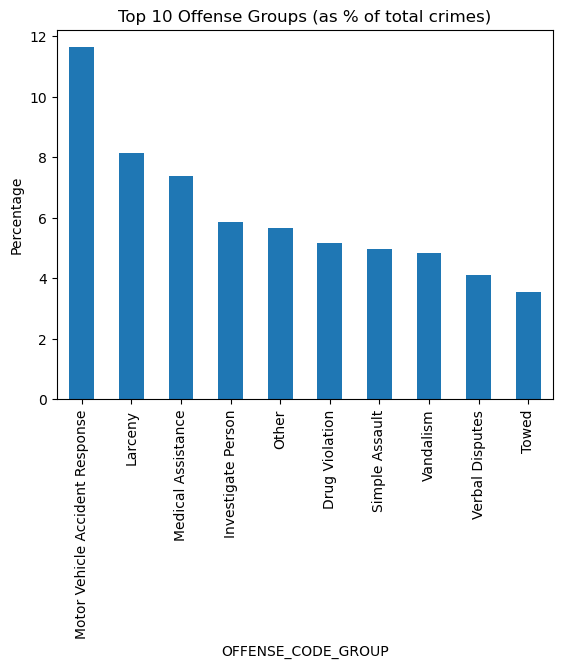

In [71]:
# Top 10 offense group
offense_val_top = crime['OFFENSE_CODE_GROUP'].value_counts().head(10)
percentage_offense = offense_val_top / crime.shape[0] *100 # Normalize the counts to get percentages

# Creating a bar chart of top 10
percentage_offense.plot(kind="bar")
plt.title('Top 10 Offense Groups (as % of total crimes)')
plt.ylabel('Percentage')
plt.show()


# what are the least common crimes in terms of offense group?

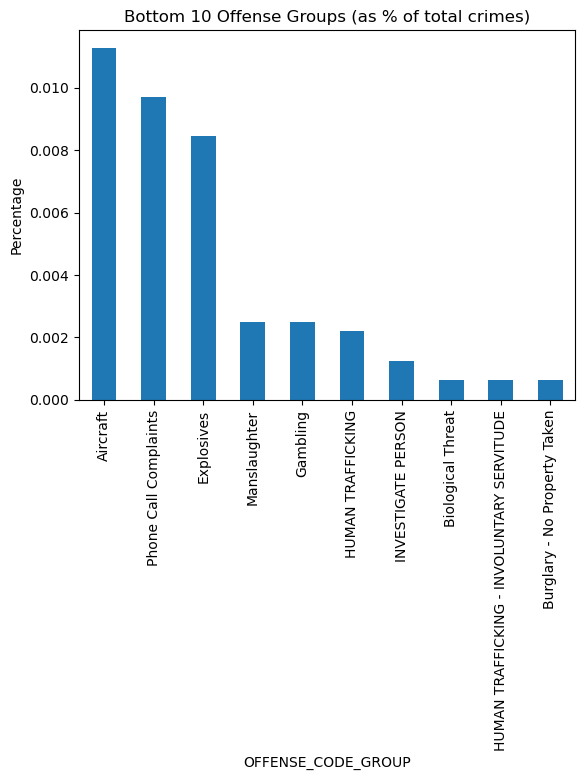

In [72]:
# Bottom 10 offense group
offense_val_bottom = crime['OFFENSE_CODE_GROUP'].value_counts()[-10:]
percentage_offense = (offense_val_bottom / crime.shape[0])* 100  # Normalize the counts to get percentages

# Creating a bar chart of top 10
percentage_offense.plot(kind="bar")
plt.title('Bottom 10 Offense Groups (as % of total crimes)')
plt.ylabel('Percentage')
plt.show()


# What are the most common offense descriptions?

In [73]:
crime

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"


In [76]:
crime['OFFENSE_DESCRIPTION'].value_counts()

OFFENSE_DESCRIPTION
SICK/INJURED/MEDICAL - PERSON                  18783
INVESTIGATE PERSON                             18753
M/V - LEAVING SCENE - PROPERTY DAMAGE          16323
VANDALISM                                      15153
ASSAULT SIMPLE - BATTERY                       14791
                                               ...  
KILLING OF FELON BY POLICE                         1
AUTO THEFT - OUTSIDE - RECOVERED IN BOSTON         1
DRUGS - GLUE INHALATION                            1
ROBBERY - KNIFE - STREET                           1
DRUGS - POSS CLASS D - INTENT MFR DIST DISP        1
Name: count, Length: 244, dtype: int64

In [77]:
# Top 10 offese description
crime['OFFENSE_DESCRIPTION'].value_counts()[:10]

OFFENSE_DESCRIPTION
SICK/INJURED/MEDICAL - PERSON            18783
INVESTIGATE PERSON                       18753
M/V - LEAVING SCENE - PROPERTY DAMAGE    16323
VANDALISM                                15153
ASSAULT SIMPLE - BATTERY                 14791
VERBAL DISPUTE                           13099
TOWED MOTOR VEHICLE                      11287
INVESTIGATE PROPERTY                     11124
LARCENY THEFT FROM BUILDING               9069
THREATS TO DO BODILY HARM                 9042
Name: count, dtype: int64

In [82]:
percentage_offense_description_top = crime['OFFENSE_DESCRIPTION'].value_counts()[:10]/crime.shape[0]*100
percentage_offense_description_top

OFFENSE_DESCRIPTION
SICK/INJURED/MEDICAL - PERSON            5.887165
INVESTIGATE PERSON                       5.877762
M/V - LEAVING SCENE - PROPERTY DAMAGE    5.116126
VANDALISM                                4.749412
ASSAULT SIMPLE - BATTERY                 4.635950
VERBAL DISPUTE                           4.105626
TOWED MOTOR VEHICLE                      3.537690
INVESTIGATE PROPERTY                     3.486601
LARCENY THEFT FROM BUILDING              2.842501
THREATS TO DO BODILY HARM                2.834039
Name: count, dtype: float64

Text(0, 0.5, 'Percentage')

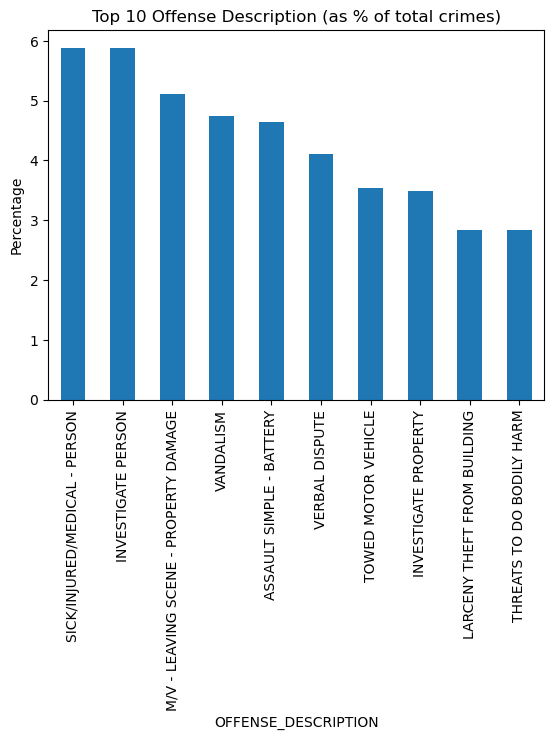

In [83]:
percentage_offense_description_top.plot(kind="bar")
plt.title("Top 10 Offense Description (as % of total crimes)")
plt.ylabel("Percentage")


# In which year were the most crimes committed?

In [85]:
crime

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"


In [93]:
crime.groupby('YEAR').count()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
YEAR,,,,,,,,,,,,,,,,
2015,53371,53371,53371,53371,53243,53371,185,53371,53371,53371,53371,53370,52089,51190,51190,53371
2016,99110,99110,99110,99110,98593,99110,279,99110,99110,99110,99110,99076,93395,92339,92339,99110
2017,100884,100884,100884,100884,100308,100884,370,100884,100884,100884,100884,100845,98153,94059,94059,100884
2018,65685,65685,65685,65685,65141,65685,185,65685,65685,65685,65685,65669,64542,61464,61464,65685


In [96]:
crime.groupby('YEAR').count()['INCIDENT_NUMBER']

YEAR
2015     53371
2016     99110
2017    100884
2018     65685
Name: INCIDENT_NUMBER, dtype: int64

In [92]:
most_crime_years = crime['YEAR'].value_counts()
most_crime_years

YEAR
2017    100884
2016     99110
2018     65685
2015     53371
Name: count, dtype: int64

Text(0.5, 1.0, 'Most crimes committed years')

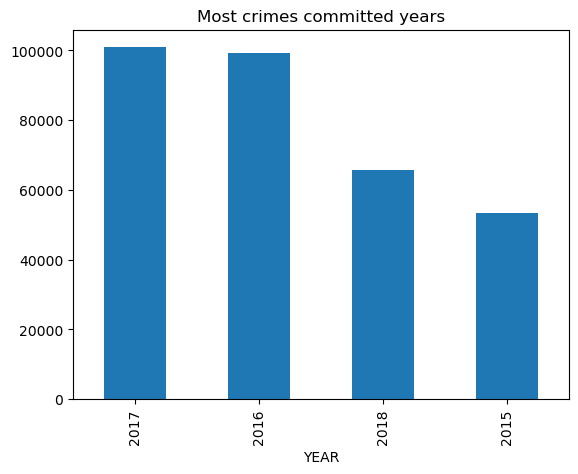

In [91]:
most_crime_years.plot(kind="bar")
plt.title("Most crimes committed years")

# Are there more crimes committed on specific days?


In [97]:
crime

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"


In [102]:
crimes_day = crime['DAY_OF_WEEK'].value_counts()
crimes_day 

DAY_OF_WEEK
Friday       48489
Wednesday    46727
Thursday     46655
Tuesday      46376
Monday       45674
Saturday     44816
Sunday       40313
Name: count, dtype: int64

In [100]:
crime.groupby('DAY_OF_WEEK').count()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,HOUR,UCR_PART,STREET,Lat,Long,Location
DAY_OF_WEEK,,,,,,,,,,,,,,,,
Friday,48489,48489,48489,48489,48190,48489,143,48489,48489,48489,48489,48479,46846,45498,45498,48489
Monday,45674,45674,45674,45674,45417,45674,114,45674,45674,45674,45674,45656,44061,42832,42832,45674
Saturday,44816,44816,44816,44816,44580,44816,228,44816,44816,44816,44816,44806,43259,41891,41891,44816
Sunday,40313,40313,40313,40313,40094,40313,155,40313,40313,40313,40313,40298,39068,37996,37996,40313
Thursday,46655,46655,46655,46655,46385,46655,131,46655,46655,46655,46655,46642,45044,43665,43665,46655
Tuesday,46376,46376,46376,46376,46110,46376,114,46376,46376,46376,46376,46365,44737,43361,43361,46376
Wednesday,46727,46727,46727,46727,46509,46727,134,46727,46727,46727,46727,46714,45164,43809,43809,46727


Text(0, 0.5, 'Number of Crimes')

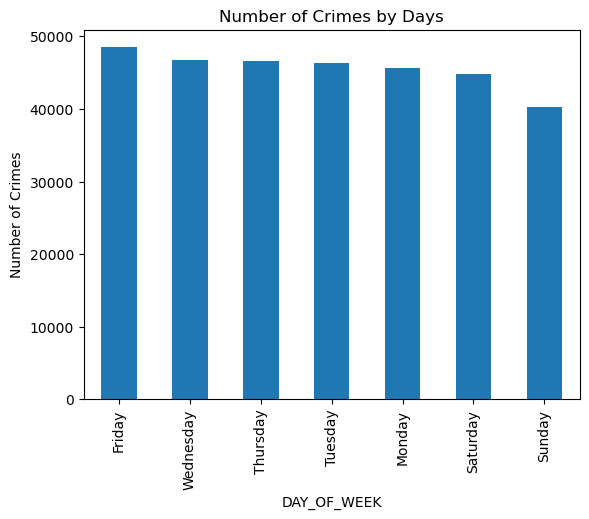

In [112]:
crimes_day.plot(kind="bar")
plt.title("Number of Crimes by Days")
plt.ylabel("Number of Crimes")


# Are there more crimes during specific hours?

In [105]:
crime

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"


In [106]:
crime.groupby('HOUR').count()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,UCR_PART,STREET,Lat,Long,Location
HOUR,,,,,,,,,,,,,,,,
0,15106,15106,15106,15106,14974,15106,108,15106,15106,15106,15106,15100,14635,14227,14227,15106
1,9267,9267,9267,9267,9215,9267,45,9267,9267,9267,9267,9263,8793,8466,8466,9267
2,7693,7693,7693,7693,7635,7693,62,7693,7693,7693,7693,7686,7279,6987,6987,7693
3,4589,4589,4589,4589,4559,4589,25,4589,4589,4589,4589,4587,4401,4258,4258,4589
4,3408,3408,3408,3408,3396,3408,18,3408,3408,3408,3408,3405,3291,3166,3166,3408
5,3311,3311,3311,3311,3284,3311,7,3311,3311,3311,3311,3308,3187,3092,3092,3311
6,5026,5026,5026,5026,5002,5026,10,5026,5026,5026,5026,5025,4868,4681,4681,5026
7,8850,8850,8850,8850,8803,8850,0,8850,8850,8850,8850,8850,8565,8319,8319,8850
8,13042,13042,13042,13042,12969,13042,9,13042,13042,13042,13042,13040,12623,12291,12291,13042


In [110]:
crime['HOUR'].value_counts().sort_values(ascending = False)

HOUR
17    20762
18    20301
16    19870
12    18676
19    17587
14    17189
13    16845
15    16519
11    16445
10    16345
20    15849
0     15106
9     14740
21    14109
8     13042
22    12925
23    10596
1      9267
7      8850
2      7693
6      5026
3      4589
4      3408
5      3311
Name: count, dtype: int64

In [111]:
crime_hour = crime['HOUR'].value_counts()
crime_hour

HOUR
17    20762
18    20301
16    19870
12    18676
19    17587
14    17189
13    16845
15    16519
11    16445
10    16345
20    15849
0     15106
9     14740
21    14109
8     13042
22    12925
23    10596
1      9267
7      8850
2      7693
6      5026
3      4589
4      3408
5      3311
Name: count, dtype: int64

Text(0, 0.5, 'Number of Crimes')

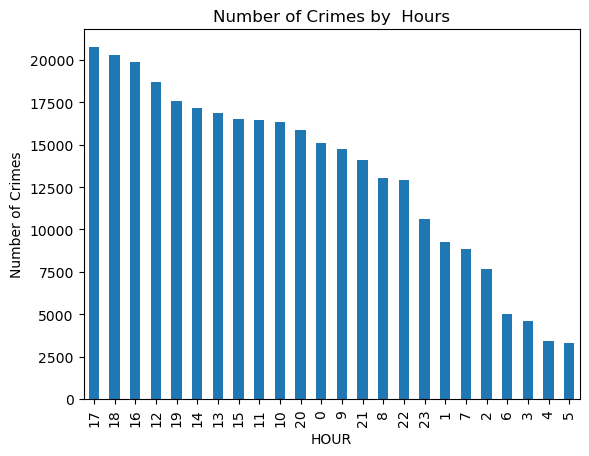

In [113]:
crime_hour.plot(kind="bar")
plt.title("Number of Crimes by  Hours")
plt.ylabel("Number of Crimes")

# On what days and during which hours are the most crimes committed

In [114]:
crime

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"


In [122]:
crime.groupby(['HOUR','DAY_OF_WEEK']).count().unstack()

INCIDENT_NUMBER                                                    \
DAY_OF_WEEK          Friday Monday Saturday Sunday Thursday Tuesday Wednesday   
HOUR                                                                            
0                      2161   2000     2612   2400     2039    1897      1997   
1                      1275   1058     1855   2043     1077    1017       942   
2                       952    846     1827   1855      774     641       798   
3                       532    583      957   1119      526     460       412   
4                       441    386      672    704      436     399       370   
5                       485    417      478    517      508     462       444   
6                       768    709      530    543      866     787       823   
7                      1398   1352     1078    758     1405    1418      1441   
8                      2041   2046     1515   1123     2037    2145      2135   
9                      2299   2148     1812   1457     2325    2322      2377   
10                     2668   2432     2064   1778     2496    2414      2493   
11                     2552   2373     2042   1802     2548    2529      2599   
12                     2860   2746     2588   2135     2821    2681      2845   
13                     2499   2479     2223   1980     2576    2493      2595   
14                     2601   2485     2378   2029     2536    2555      2605   
15                     2566   2438     2084   1918     2531    2503      2479   
16                     3073   3029     2445   2216     2974    3080      3053   
17                     3252   3253     2555   2377     2931    3241      3153   
18                     3010   3089     2528   2326     3033    3217      3098   
19                     2564   2606     2301   2114     2510    2768      2724   
20                     2307   2319     2131   2109     2349    2369      2265   
21                     2089   2003     2077   1902     2070    1925      2043   
22                     2160   1634     2113   1728     1795    1757      1738   
23                     1936   1243     1951   1380     1492    1296      1298   

            OFFENSE_CODE                  ...     Long                    \
DAY_OF_WEEK       Friday Monday Saturday  ... Thursday Tuesday Wednesday   
HOUR                                      ...                              
0                   2161   2000     2612  ...     1914    1779      1877   
1                   1275   1058     1855  ...      969     910       855   
2                    952    846     1827  ...      704     586       716   
3                    532    583      957  ...      487     431       383   
4                    441    386      672  ...      398     373       345   
5                    485    417      478  ...      475     421       419   
6                    768    709      530  ...      815     728       766   
7                   1398   1352     1078  ...     1316    1328      1344   
8                   2041   2046     1515  ...     1901    2019      2006   
9                   2299   2148     1812  ...     2203    2190      2251   
10                  2668   2432     2064  ...     2360    2293      2377   
11                  2552   2373     2042  ...     2401    2399      2459   
12                  2860   2746     2588  ...     2687    2521      2695   
13                  2499   2479     2223  ...     2419    2357      2450   
14                  2601   2485     2378  ...     2393    2396      2438   
15                  2566   2438     2084  ...     2352    2376      2321   
16                  3073   3029     2445  ...     2760    2865      2877   
17                  3252   3253     2555  ...     2731    2972      2901   
18                  3010   3089     2528  ...     2792    2943      2866   
19                  2564   2606     2301  ...     2337    2572      2550   
20                  2307   2319     2131  ...     2220    2226      2135   


In [125]:
week_and_hour = crime.groupby(['HOUR','DAY_OF_WEEK'])['INCIDENT_NUMBER'].count().unstack()
week_and_hour

DAY_OF_WEEK,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
HOUR,,,,,,,
0,2161,2000,2612,2400,2039,1897,1997
1,1275,1058,1855,2043,1077,1017,942
2,952,846,1827,1855,774,641,798
3,532,583,957,1119,526,460,412
4,441,386,672,704,436,399,370
5,485,417,478,517,508,462,444
6,768,709,530,543,866,787,823
7,1398,1352,1078,758,1405,1418,1441
8,2041,2046,1515,1123,2037,2145,2135


In [120]:
crime.groupby(['HOUR','DAY_OF_WEEK']).count()['INCIDENT_NUMBER']

HOUR  DAY_OF_WEEK
0     Friday         2161
      Monday         2000
      Saturday       2612
      Sunday         2400
      Thursday       2039
                     ... 
23    Saturday       1951
      Sunday         1380
      Thursday       1492
      Tuesday        1296
      Wednesday      1298
Name: INCIDENT_NUMBER, Length: 168, dtype: int64

<Axes: xlabel='DAY_OF_WEEK', ylabel='HOUR'>

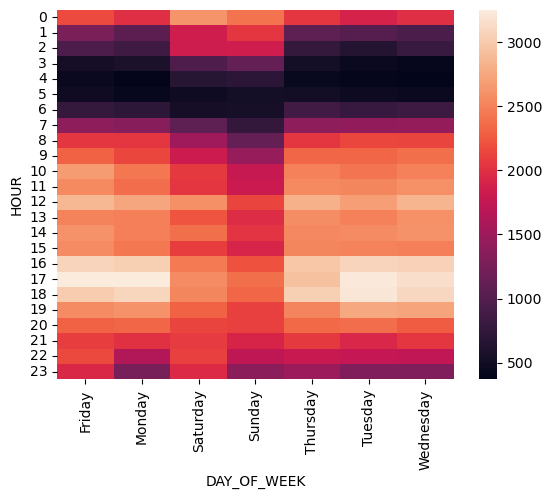

In [126]:
sns.heatmap(week_and_hour)

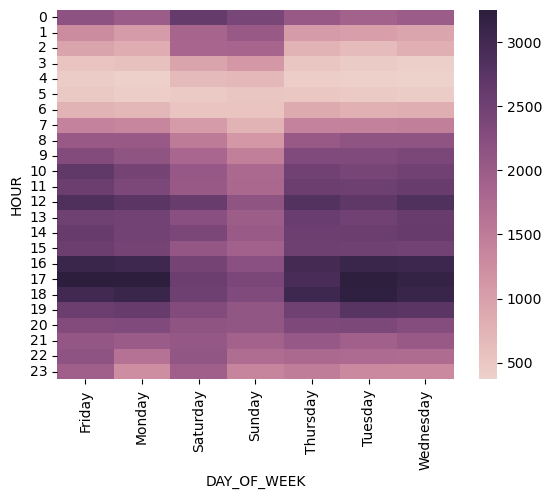

In [127]:
sns.heatmap(week_and_hour, cmap = sns.cubehelix_palette(as_cmap=True));

# In which months were the number of crimes were below average

In [129]:
crime

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"


In [132]:
crime.groupby(['MONTH']).count()['INCIDENT_NUMBER'].mean()

26587.5

In [137]:
avg_crime = crime.groupby(['YEAR','MONTH']).count()['INCIDENT_NUMBER'].mean()
print("The average number of crims is: "+str(avg_crime))
year_and_month = crime.groupby(['YEAR','MONTH']).count()['INCIDENT_NUMBER'].unstack()

def style_negative(v, props=''):
    return props if v < avg_crime else None
s2 = year_and_month.style.applymap(style_negative, props='color:blue;')\
              .applymap(lambda v: 'opacity: 20%;' if (v < 0.3) and (v > -0.3) else None)
s2


The average number of crims is: 7976.25


C:\Users\USER\AppData\Local\Temp\ipykernel_3980\851352241.py:7: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  s2 = year_and_month.style.applymap(style_negative, props='color:blue;')\
C:\Users\USER\AppData\Local\Temp\ipykernel_3980\851352241.py:8: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(lambda v: 'opacity: 20%;' if (v < 0.3) and (v > -0.3) else None)


MONTH,1,2,3,4,5,6,7,8,9,10,11,12
YEAR,,,,,,,,,,,,
2015,nan,nan,nan,nan,nan,4188.000000,8322.000000,8340.000000,8411.000000,8305.000000,7818.000000,7987.000000
2016,7835.000000,7307.000000,8199.000000,8101.000000,8578.000000,8558.000000,8618.000000,8938.000000,8521.000000,8582.000000,7922.000000,7951.000000
2017,7991.000000,7408.000000,8179.000000,8069.000000,8715.000000,8985.000000,9075.000000,9206.000000,8940.000000,8846.000000,7935.000000,7535.000000
2018,7782.000000,6937.000000,7768.000000,7916.000000,8906.000000,8834.000000,8538.000000,8337.000000,667.000000,nan,nan,nan
